In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.metrics as mets
from pydataset import data
import os
import acquire_copy as acq
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier,\
export_text,\
plot_tree
from sklearn.metrics import accuracy_score, \
confusion_matrix,\
classification_report

## EXERCISES

Using the titanic data, in your classification-exercises repository, create a notebook, 
decision_tree.ipynb where you will do the following:
    
#### Exercise 1
What is your baseline prediction? What is your baseline accuracy? remember: your baseline
prediction for a classification problem is predicting the most prevelant class in the 
training dataset (the mode). When you make those predictions, what is your accuracy? 
This is your baseline accuracy.


In [7]:
def get_titanic_data():
    if os.path.isfile('titanic.csv'):
        df = pd.read_csv('titanic.csv', index_col=0)
    else:
        query = """select * from passengers"""
        connection = connect('titanic_db')
        df = pd.read_sql(query, connection)
        df.to_csv('titanic.csv')
    return df

def prep_titanic(df):
    """This function preps data in the titanic csv (via the get_titanic_data() function
    in acquire_copy) for future use in modeling"""
    
    #impute for missing values in age & embark town
    df['age']=df['age'].fillna(df['age'].mean())
    df['embark_town'] = df['embark_town'].fillna('Southampton')
    # Make dummy variables for strings
    dummy_df = pd.get_dummies(data=df[['sex','embark_town']], dummy_na=False, drop_first=False)
    df = pd.concat([df, dummy_df], axis = 1)
    # Drop non-essential columns
    df=df.drop(columns=['embarked', 'passenger_id', 'class', 'deck', 'sex', 'embark_town'])

    return df

def split_titanic(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on titanic.survived.
    return train, validate, test DataFrames.
    '''
    train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
    train, val = train_test_split(train, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train.survived)
    return train, val, test


In [8]:
tdf= get_titanic_data()
tdf

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [9]:
tdf = prep_titanic(tdf)

In [10]:
tdf.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,1


In [13]:
train, val, test = split_titanic(tdf)

**Exercise 1.1**: What is your baseline prediction? 
              What is your baseline accuracy?
    
    

#### NOTES:

1. X_train 	Dataframe, Feature:  Feature selection, fit models, make predictions
2. y_train 	Series, Target: 	Feature selection, evaluate model predictions
3. X_validate 	Dataframe, Features:	Make predictions using top models
4. y_validate 	Series, Target:	Evaluate model predictions made from X_validate to assess overfitting
5. X_test 	Dataframe, Features:	Make predictions using best model
6. y_test 	Series, Target: 	Evaluate model predictions made from X_test to estimate future performance on new data

(Source: Codeup Lesson: Decsion Tree)

In [44]:
X_train, X_val, X_test = train.drop(columns='survived'), val.drop(columns='survived'), test.drop(columns='survived')
y_train, y_val, y_test = train.survived, val.survived, test.survived

In [43]:
X_val.head(2)

,pclass,age,sibsp,parch,fare,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
610,3,39.0,1,5,31.2750,0,1,0,0,0,1
424,3,18.0,1,1,20.2125,0,0,1,0,0,1


In [25]:
train.survived.value_counts(), y_train.value_counts()

(0    307
 1    191
 Name: survived, dtype: int64,
 0    307
 1    191
 Name: survived, dtype: int64)

In [26]:
# Baseline prediction is usually set to find the most common occurance

# Baseline prediction = death

# Baseline accuracy is percentage value of baseline prediction/ total

total = 191+307

baseline_acc= 307/total
print(f'''The baseline prediction is '0'(did not survive) and the 
        baseline accuracy is {baseline_acc:.2%} ''')

The baseline prediction is '0'(did not survive) and the 
        baseline accuracy is 61.65% 


In [30]:
base_pred = (y_train == 0)

In [32]:
# Gives me a count of how many deaths I have in my train set
base_pred.value_counts()

True     307
False    191
Name: survived, dtype: int64

In [42]:
train = train.drop(columns='bl_pred')
train.head(2)

KeyError: "['bl_pred'] not found in axis"

**Baseline Prediction:** 0/ Did not survive

**Baseline Accuracy:** 61.65%

#### Exercise 2
Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [46]:
# Make the thing
treebeard = DecisionTreeClassifier(max_depth=3, random_state=123)

In [47]:
# Fit the thing
treebeard = treebeard.fit(X_train, y_train)

In [51]:
# Predict the thing on **X_train**
y_preds = treebeard.predict(X_train)

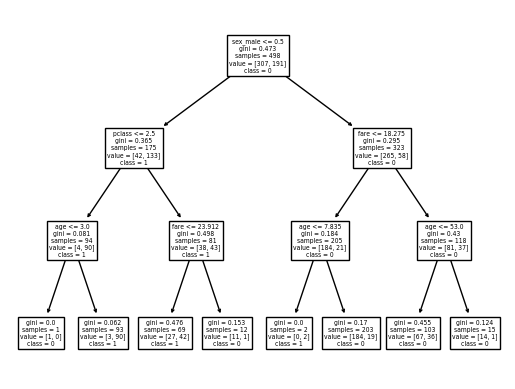

In [49]:
plot_tree(treebeard, feature_names=X_train.columns, class_names = ['0', '1'])
plt.show()

#### Exercise 3

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [58]:
print(f' Model Score:{round(accuracy_score(y_train, y_preds), 2)}')

# alternatively,
# treebeard.score(X_train, y_train)

 Model Score:0.83


In [56]:
print(classification_report(y_train, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



In [74]:
classr = classification_report(y_train, y_preds, output_dict=True)

In [76]:
#Make it into a dataframe for easier readability
pd.DataFrame(classr).T

,precision,recall,f1-score,support
0,0.829341,0.902280,0.864275,307.000000
1,0.817073,0.701571,0.754930,191.000000
accuracy,0.825301,0.825301,0.825301,0.825301
macro avg,0.823207,0.801925,0.809602,498.000000
weighted avg,0.824636,0.825301,0.822337,498.000000


In [66]:
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_preds))

Confusion Matrix:
[[277  30]
 [ 57 134]]


In [68]:
# From review
# Allows to view my confusion matrix as a dataframe for easier readability
rubric = pd.DataFrame( {'pred_0': ['True Negative', 'False Negative'],
                        'pred_1': ['False Positive', 'True Positive']},
                      index=['actual_0', 'actual_1'])

In [69]:
cm = confusion_matrix(y_train, y_preds)

rubric + ':' + cm.astype(str)

,pred_0,pred_1
actual_0,True Negative:277,False Positive:30
actual_1,False Negative:57,True Positive:134


#### Exercise 4

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [80]:
 #returns an array from my confusion matrix
TN, FP, FN, TP = cm.ravel()

In [81]:
All = TP + TN + FP +FN
acc = (TP + TN) / All
recall = TP/ (TP +FN)
precision = TP / (TP + FP)
FPR = false_pos_rate = FP/ (FP + TN)
TNR = true_neg_rate = TN/ (TN +FP)
FNR = false_neg_rate = FN/ (FN +TP)
f1_score = 2 * ((precision*recall)/ (precision+recall))
support_pos = TP + FN
support_neg = FP + TN

In [87]:
print(f'''Accuracy: {acc:.2%},
Recall: {recall:.2%},
Precision: {precision:.2%},
False Positive Rate: {FPR:.2%},
True Negative Rate: {TNR:.2%},
False Negative Rate: {FNR:.2%},
F-1 Score: {f1_score:.2%},
Positive Support: {support_pos},
Negative Support: {support_neg}''')

Accuracy: 82.53%,
Recall: 70.16%,
Precision: 81.71%,
False Positive Rate: 9.77%,
True Negative Rate: 90.23%,
False Negative Rate: 29.84%,
F-1 Score: 75.49%,
Positive Support: 191,
Negative Support: 307


#### Exercise 5
Run through steps 2-4 using a different max_depth value.

In [106]:
christmas=[]
for i in range(1,9):
    # make the thing
    tree=DecisionTreeClassifier(max_depth= i, random_state= 123)
    # fit the thing 
    tree.fit(X_train, y_train)
    # use the thing to evaluate model performance
    out_of_sample= tree.score(X_test, y_test)
    in_sample=tree.score(X_train, y_train)
    difference= in_sample - out_of_sample
    acc = (TP + TN) / All
    recall = TP/ (TP +FN)
    precision = TP / (TP + FP)
    FPR = false_pos_rate = FP/ (FP + TN)
    TNR = true_neg_rate = TN/ (TN +FP)
    FNR = false_neg_rate = FN/ (FN +TP)
    f1_score = 2 * ((precision*recall)/ (precision+recall))
    support_pos = TP + FN
    support_neg = FP + TN
    #labeling columns for table
    heads= {'max_depth': {i}, 
            'train_accuracy' : in_sample,
            'test_accuracy' : out_of_sample,
            'train_test_difference' : difference
           }
    christmas.append(heads)
willow = pd.DataFrame(christmas)
cm = classification_report(y_train, y_preds, output_dict=True)

In [96]:
willow

,max_depth,train_accuracy,test_accuracy,train_test_difference
0,{1},0.799197,0.782123,0.017074
1,{2},0.799197,0.782123,0.017074
2,{3},0.825301,0.798883,0.026419
3,{4},0.835341,0.804469,0.030872
4,{5},0.853414,0.821229,0.032185
5,{6},0.865462,0.810056,0.055406
6,{7},0.885542,0.754190,0.131352
7,{8},0.897590,0.776536,0.121054


#### Exercise 6/7


Which model performs better on your in-sample data?

A: Model with max depth of 7
    
    
Which model performs best on your out-of-sample data, the validate set?

A: Model with max depth of 5